Dataset caricato: (1546, 265)
=== ANALISI FEATURES AUDIO ===
Features audio: 260
Campioni: 1546

Statistiche features audio:


,F0final_sma_stddev,F0final_sma_amean,voicingFinalUnclipped_sma_stddev,voicingFinalUnclipped_sma_amean,jitterLocal_sma_stddev,jitterLocal_sma_amean,jitterDDP_sma_stddev,jitterDDP_sma_amean,shimmerLocal_sma_stddev,shimmerLocal_sma_amean,...,pcm_fftMag_mfcc_sma_de[10]_stddev,pcm_fftMag_mfcc_sma_de[10]_amean,pcm_fftMag_mfcc_sma_de[11]_stddev,pcm_fftMag_mfcc_sma_de[11]_amean,pcm_fftMag_mfcc_sma_de[12]_stddev,pcm_fftMag_mfcc_sma_de[12]_amean,pcm_fftMag_mfcc_sma_de[13]_stddev,pcm_fftMag_mfcc_sma_de[13]_amean,pcm_fftMag_mfcc_sma_de[14]_stddev,pcm_fftMag_mfcc_sma_de[14]_amean
count,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,...,1546.000000,1.546000e+03,1546.000000,1546.000000,1546.000000,1.546000e+03,1546.000000,1.546000e+03,1546.000000,1.546000e+03
mean,59.101560,129.781578,0.048941,0.759158,0.106811,0.073847,0.112229,0.077262,0.118253,0.156670,...,2.217006,9.558776e-06,2.152297,-0.000030,2.036260,1.526785e-05,1.893260,-3.073638e-05,1.705628,-1.247022e-05
std,26.846825,58.654933,0.029216,0.041294,0.023132,0.020121,0.025433,0.022314,0.027256,0.032401,...,0.366320,2.217476e-03,0.357426,0.002206,0.341153,2.213619e-03,0.322824,1.935291e-03,0.280086,1.753013e-03
min,5.745750,8.670272,0.013314,0.492476,0.020421,0.005219,0.012852,0.002990,0.033814,0.010398,...,0.870420,-1.106633e-02,0.768988,-0.011225,0.735659,-1.596713e-02,0.669461,-9.372492e-03,0.589547,-1.531501e-02
25%,39.114326,88.549414,0.033251,0.739329,0.091968,0.060087,0.096485,0.062581,0.099175,0.138241,...,1.999967,-7.302054e-04,1.928234,-0.000723,1.817290,-6.072708e-04,1.687395,-5.828523e-04,1.525821,-4.915560e-04
50%,56.481818,115.562054,0.040713,0.760317,0.109063,0.074063,0.114245,0.077446,0.114769,0.159400,...,2.184842,3.132644e-10,2.126394,-0.000009,2.014505,2.739821e-11,1.869585,7.681554e-10,1.686705,1.307549e-10
75%,74.172151,156.309578,0.053160,0.781950,0.122819,0.086701,0.130637,0.092030,0.134010,0.177852,...,2.417844,7.393631e-04,2.339834,0.000641,2.219255,6.371603e-04,2.070524,5.432492e-04,1.850146,5.237230e-04
max,181.584752,424.276725,0.264446,0.915788,0.172947,0.151585,0.187686,0.163860,0.238377,0.282467,...,3.813313,1.384007e-02,4.364806,0.016483,3.695817,1.259583e-02,3.518508,1.936967e-02,3.225061,9.175731e-03



Valori nulli: 0
Features con valori nulli: 0

=== MATRICE DI CORRELAZIONE ===


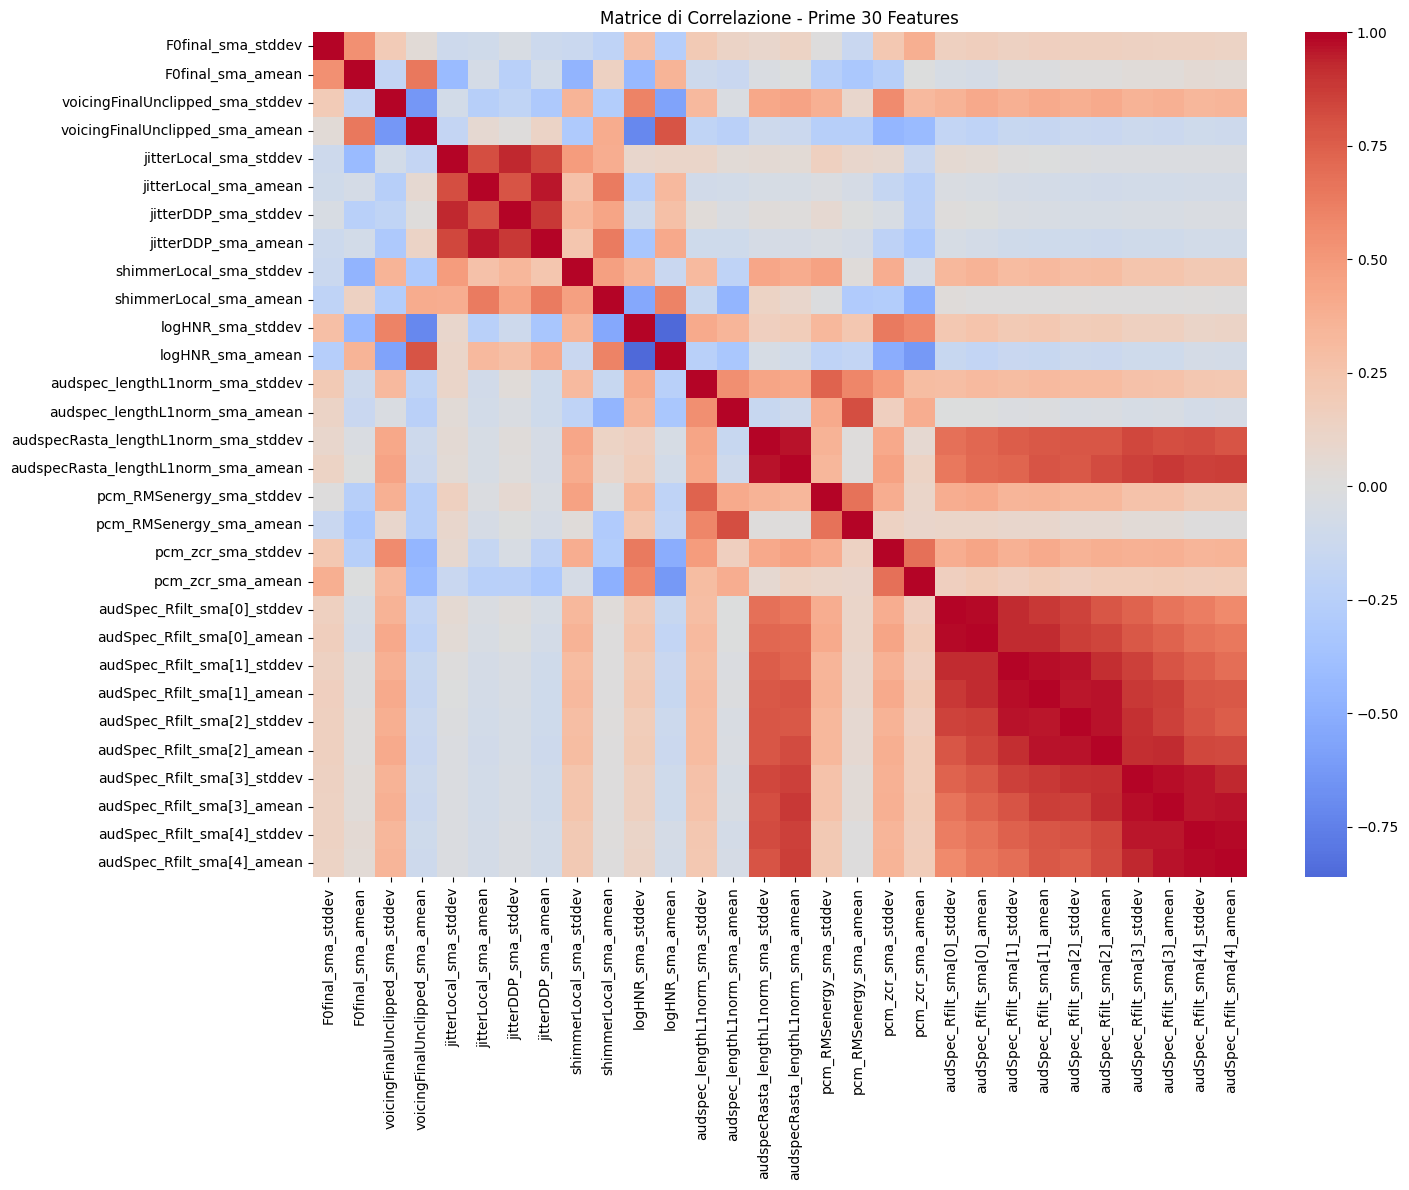


=== ANALISI PCA ===


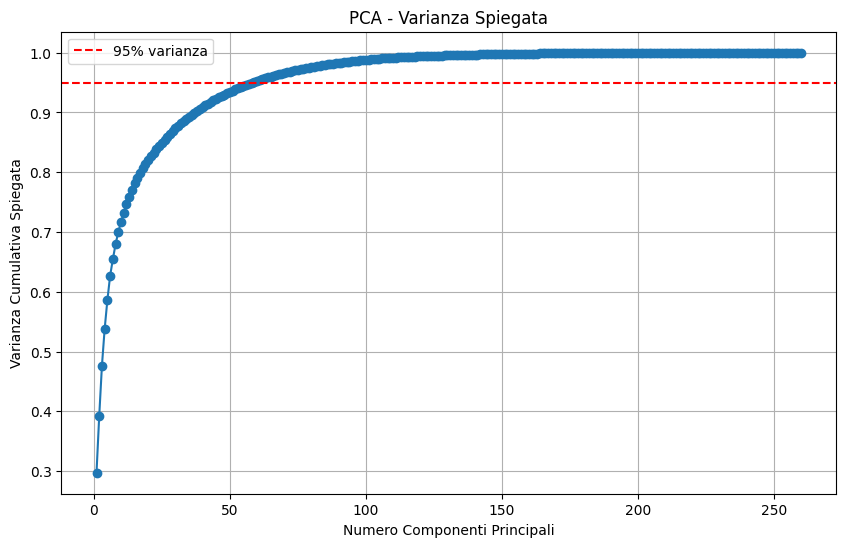

Componenti per 95% varianza: 58

=== VISUALIZZAZIONE SPAZIO FEATURES ===


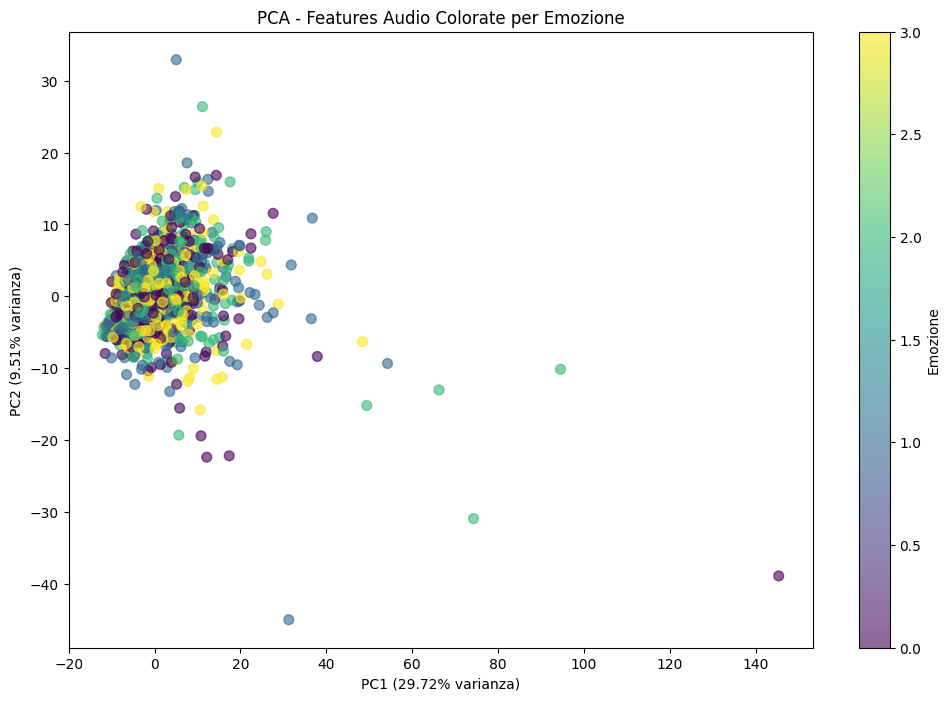


=== FEATURES PIÙ SIGNIFICATIVE ===
Top 10 features per varianza:
pcm_fftMag_spectralVariance_sma_amean        2.049050e+12
pcm_fftMag_spectralVariance_sma_stddev       1.595465e+12
pcm_fftMag_spectralVariance_sma_de_stddev    1.387543e+11
pcm_fftMag_spectralKurtosis_sma_amean        1.771517e+06
pcm_fftMag_spectralKurtosis_sma_stddev       1.162264e+06
pcm_fftMag_spectralRollOff90.0_sma_amean     7.838976e+05
pcm_fftMag_spectralVariance_sma_de_amean     5.265499e+05
pcm_fftMag_spectralRollOff90.0_sma_stddev    4.821239e+05
pcm_fftMag_spectralRollOff75.0_sma_amean     2.742171e+05
pcm_fftMag_spectralRollOff75.0_sma_stddev    2.196181e+05
dtype: float64


In [2]:
# CARICAMENTO E PRIMA ANALISI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Caricamento del dataset consolidato
df = pd.read_csv('../data/processed/audio_emotion_dataset.csv')
print("Dataset caricato:", df.shape)

# 1. ANALISI DELLE FEATURES AUDIO
print("=== ANALISI FEATURES AUDIO ===")

# Separazione features (X) e target (y)
X = df.drop(columns=['Track_ID', 'Title', 'Valence', 'Arousal', 'Emotion_Label'])
y = df['Emotion_Label']

print(f"Features audio: {X.shape[1]}")
print(f"Campioni: {X.shape[0]}")

# Statistiche descrittive delle features
print("\nStatistiche features audio:")
display(X.describe())

# 2. CONTROLLO VALORI NULLI E OUTLIER
print(f"\nValori nulli: {X.isnull().sum().sum()}")
print(f"Features con valori nulli: {X.isnull().any().sum()}")

# 3. ANALISI CORRELAZIONE FEATURES
print("\n=== MATRICE DI CORRELAZIONE ===")
plt.figure(figsize=(15, 12))
corr_matrix = X.corr()

# Heatmap delle correlazioni (solo prime 30 features per leggibilità)
sns.heatmap(corr_matrix.iloc[:30, :30], cmap='coolwarm', center=0)
plt.title('Matrice di Correlazione - Prime 30 Features')
plt.tight_layout()
plt.show()

# 4. ANALISI VARIANZA CON PCA
print("\n=== ANALISI PCA ===")
# Standardizzazione
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA per vedere la variabilità spiegata
pca = PCA()
pca.fit(X_scaled)

# Grafico della varianza spiegata
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.xlabel('Numero Componenti Principali')
plt.ylabel('Varianza Cumulativa Spiegata')
plt.title('PCA - Varianza Spiegata')
plt.legend()
plt.grid(True)
plt.show()

print(f"Componenti per 95% varianza: {(pca.explained_variance_ratio_.cumsum() <= 0.95).sum()}")

# 5. VISUALIZZAZIONE PCA 2D (Colorata per emozione)
print("\n=== VISUALIZZAZIONE SPAZIO FEATURES ===")
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0], 
                     cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Emozione')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} varianza)')
plt.title('PCA - Features Audio Colorate per Emozione')
plt.show()

# 6. ANALISI FEATURES PIÙ IMPORTANTI (Opzionale)
print("\n=== FEATURES PIÙ SIGNIFICATIVE ===")
# Calcola la varianza per ogni feature
feature_variance = X.var().sort_values(ascending=False)
print("Top 10 features per varianza:")
print(feature_variance.head(10))